# KPI for invoice preparation time

# In brevi

TBD

# Data

The data file is available here (kpis.csv). It consists of a date column and six KPI data columns. Dates are entered using ISO 8601 date format (yyyy-mm-dd). The KPI columns are the number of commits per KPI.

In [1]:
# Import the required libraries and modules.
import pandas as pd
import numpy as np
import matplotlib.axes as axes

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
title = 'Invoicing cycle time'
subtitle = 'Start of invoice to invoice sent'
ylabel = 'Time (min)'
xlabel = 'Date'
columns = ['Start invoice', 'Send invoice', 'Total time']

In [3]:
def despine(ax: axes.Axes) -> None:
    '''
    Remove the top and right spines of a graph.

    There is only one x axis, on the bottom, and one y axis, on the left.
    '''
    for spine in 'right', 'top':
        ax.spines[spine].set_visible(False)

In [4]:
def calculate_cycle_time(df, columns):
    '''
    Calculate cycle time with two columns, store in third column
    columns[0] == start time
    columns[1] == end time
    columns[2] == total time
    '''
    df[columns[0]] = pd.to_datetime(df[columns[0]],
                                         format='%H:%M')
    df[columns[1]] = pd.to_datetime(df[columns[1]],
                                        format='%H:%M')
    df[columns[2]] = (df[columns[1]] - df[columns[0]])
    df[columns[2]] = df[columns[2]] / np.timedelta64(1, 'm')
    df = df.drop([columns[2]], axis=1)
    return df

In [5]:
def plot_cycle_time(df, columns):
    ax = df[columns[2]].plot.line(legend=False, marker='o', markersize=3)
    ax.axis('auto')
    despine(ax)
    ax.set_title(title + '\n' + subtitle)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.figure.savefig('invoice_cycle_time.svg', format='svg')
    ax.figure.savefig('invoice_cycle_time.pdf', format='pdf')

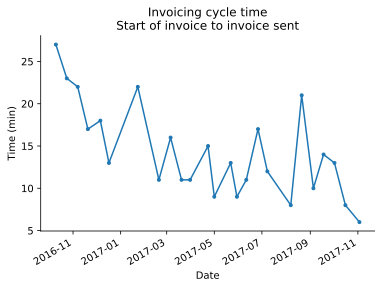

In [6]:
if __name__ == '__main__':
    invoicing = pd.read_csv('invoice_preparation_time.csv',
                            parse_dates=True,
                            index_col='Date')
    calculate_cycle_time(invoicing, columns)
    plot_cycle_time(invoicing, columns)